# Анализ оттока клиентов банка "Метанпром"

От отдела маркетинга банка "Метанпром" поступил запрос об анализе данных клиентов регионального банка и выделения сегментов клиентов, которые склонны уходить из банка. Запрос поступил в связи с тем, что в последнее время в банке драматически сильно повысился отток клиентов. Маркетинговые воздействия на выявленые сегменты отточности клиентов могут привести к уменьшению оттока клиентов банка.

**Цель исследования**: максимально эффективно выделить сегменты отточных клиентов, чтобы они были
однородными, высокоотточными и покрывали максимум проблемных зон банка.


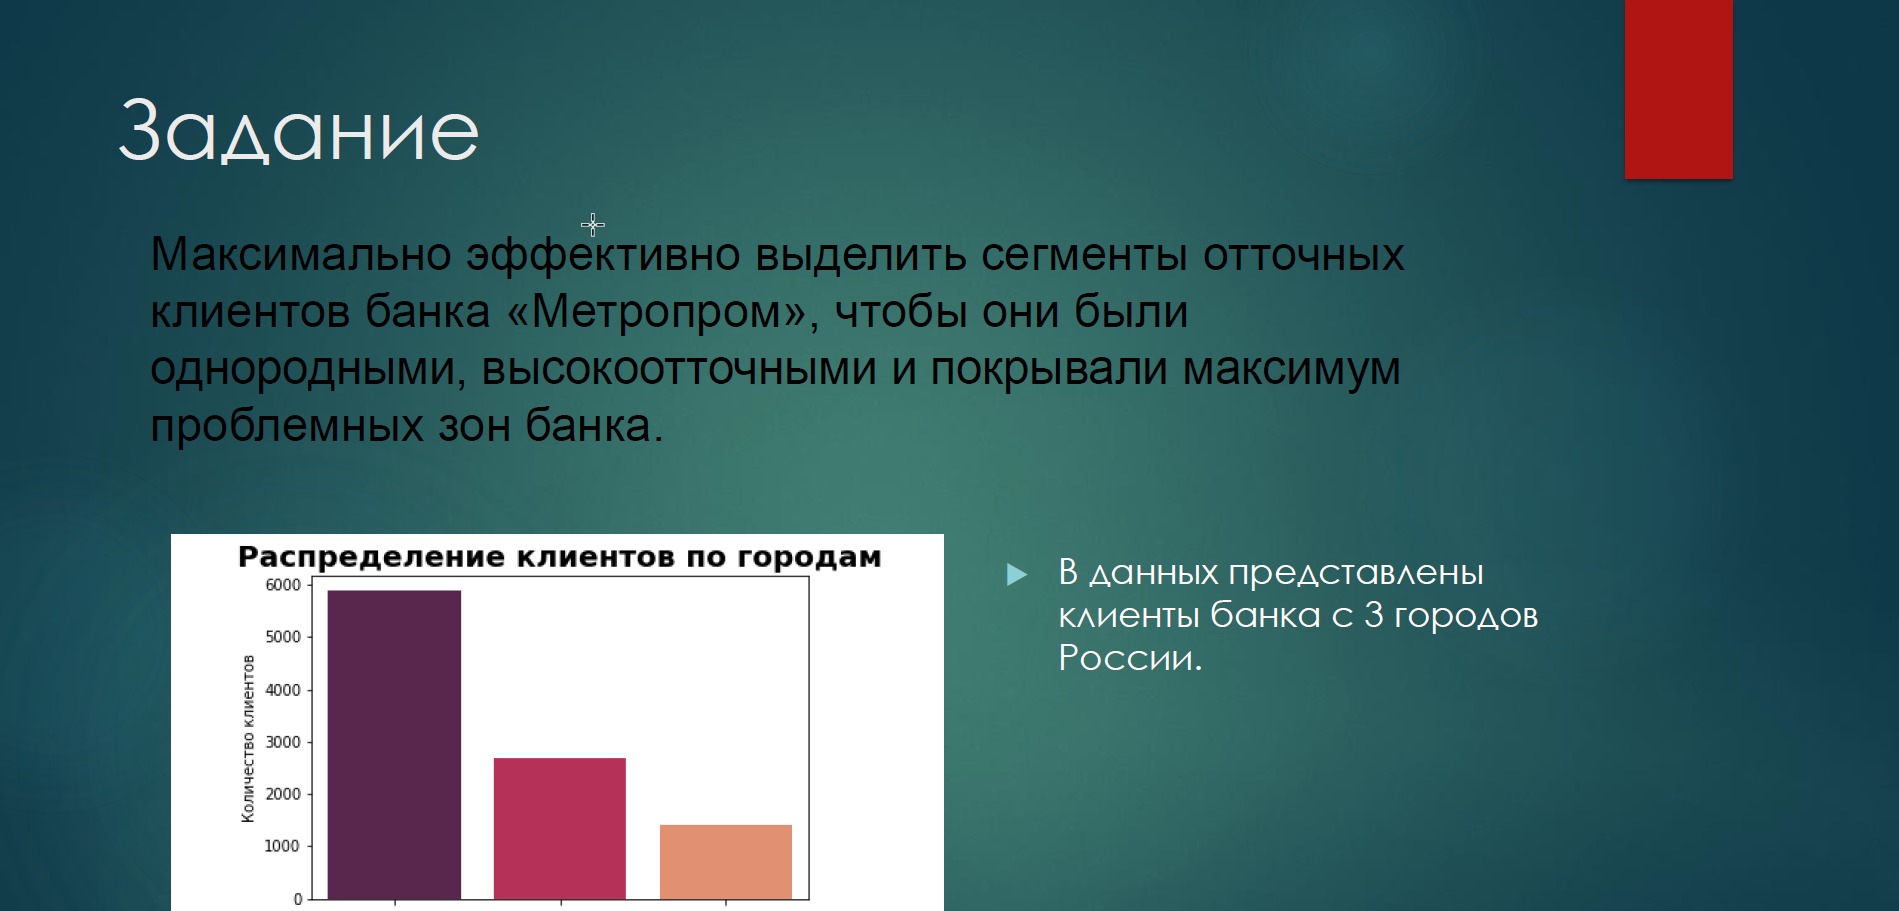

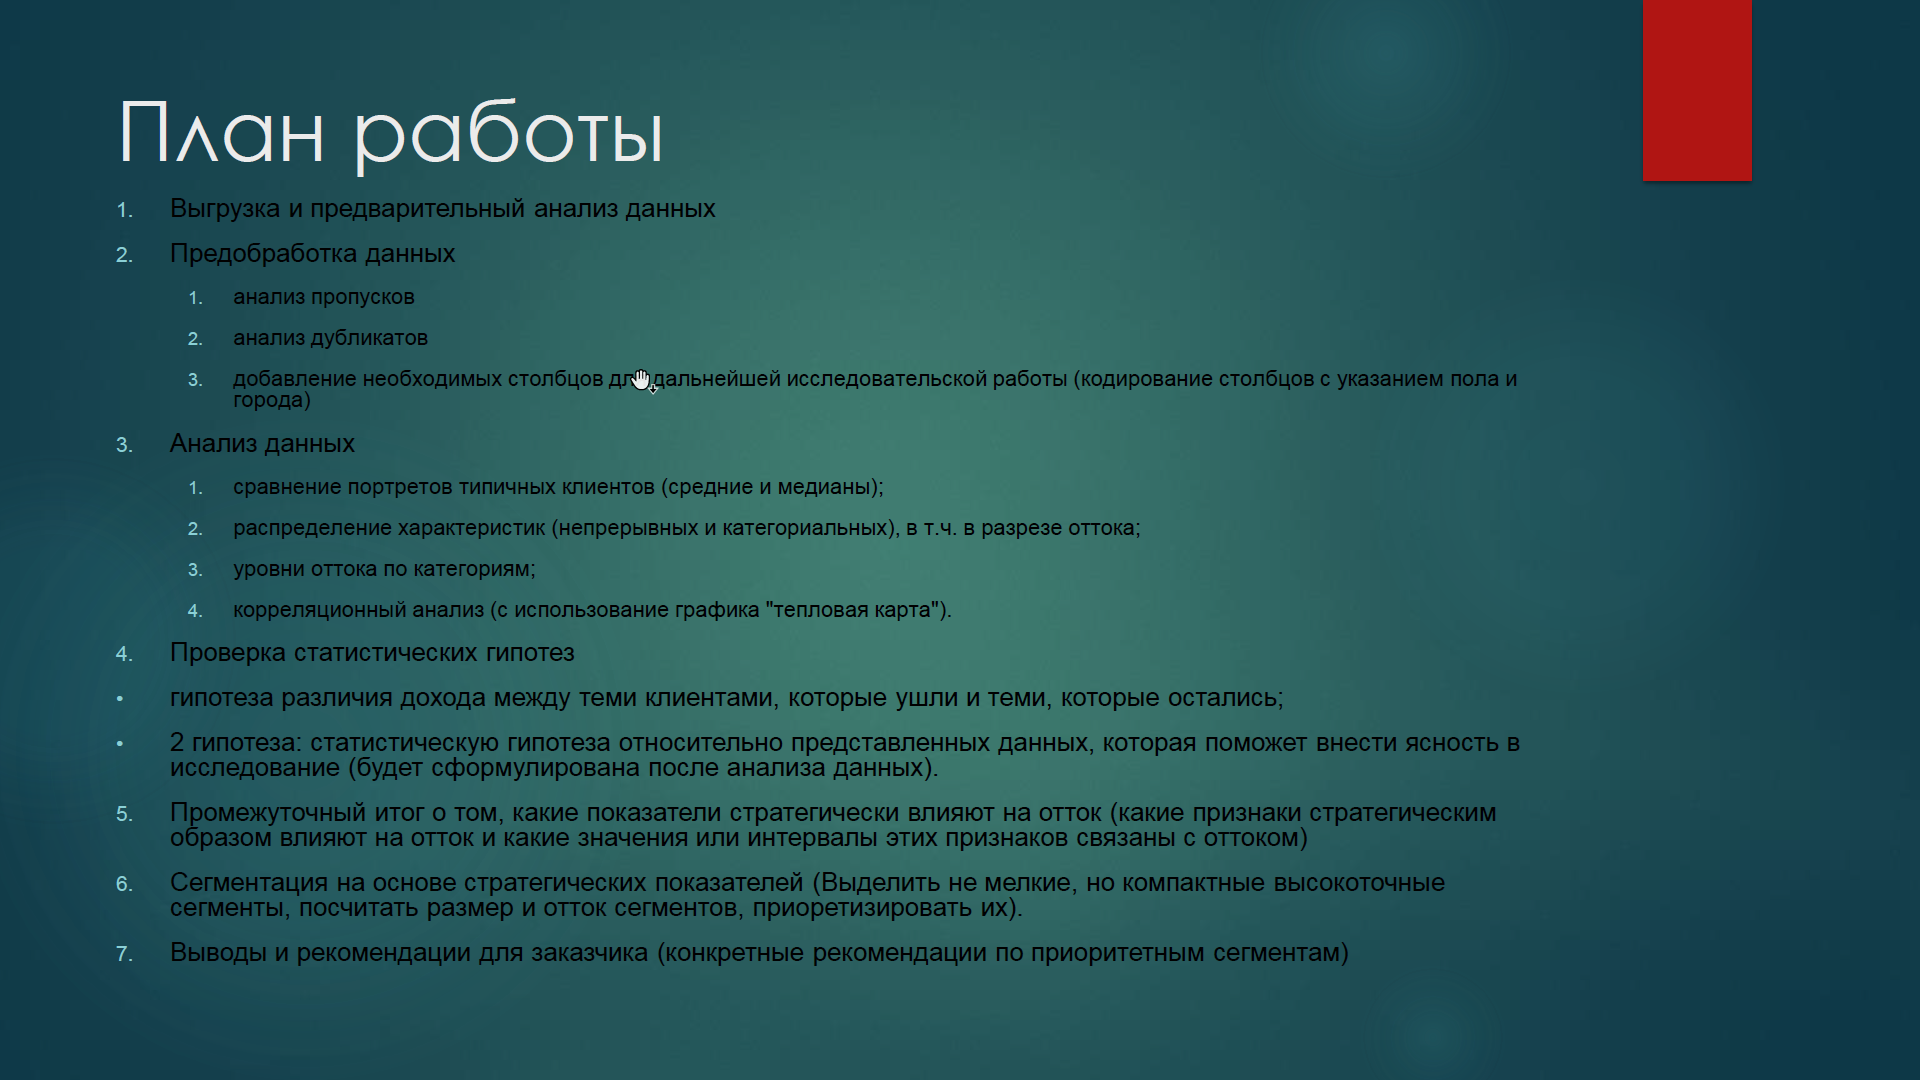

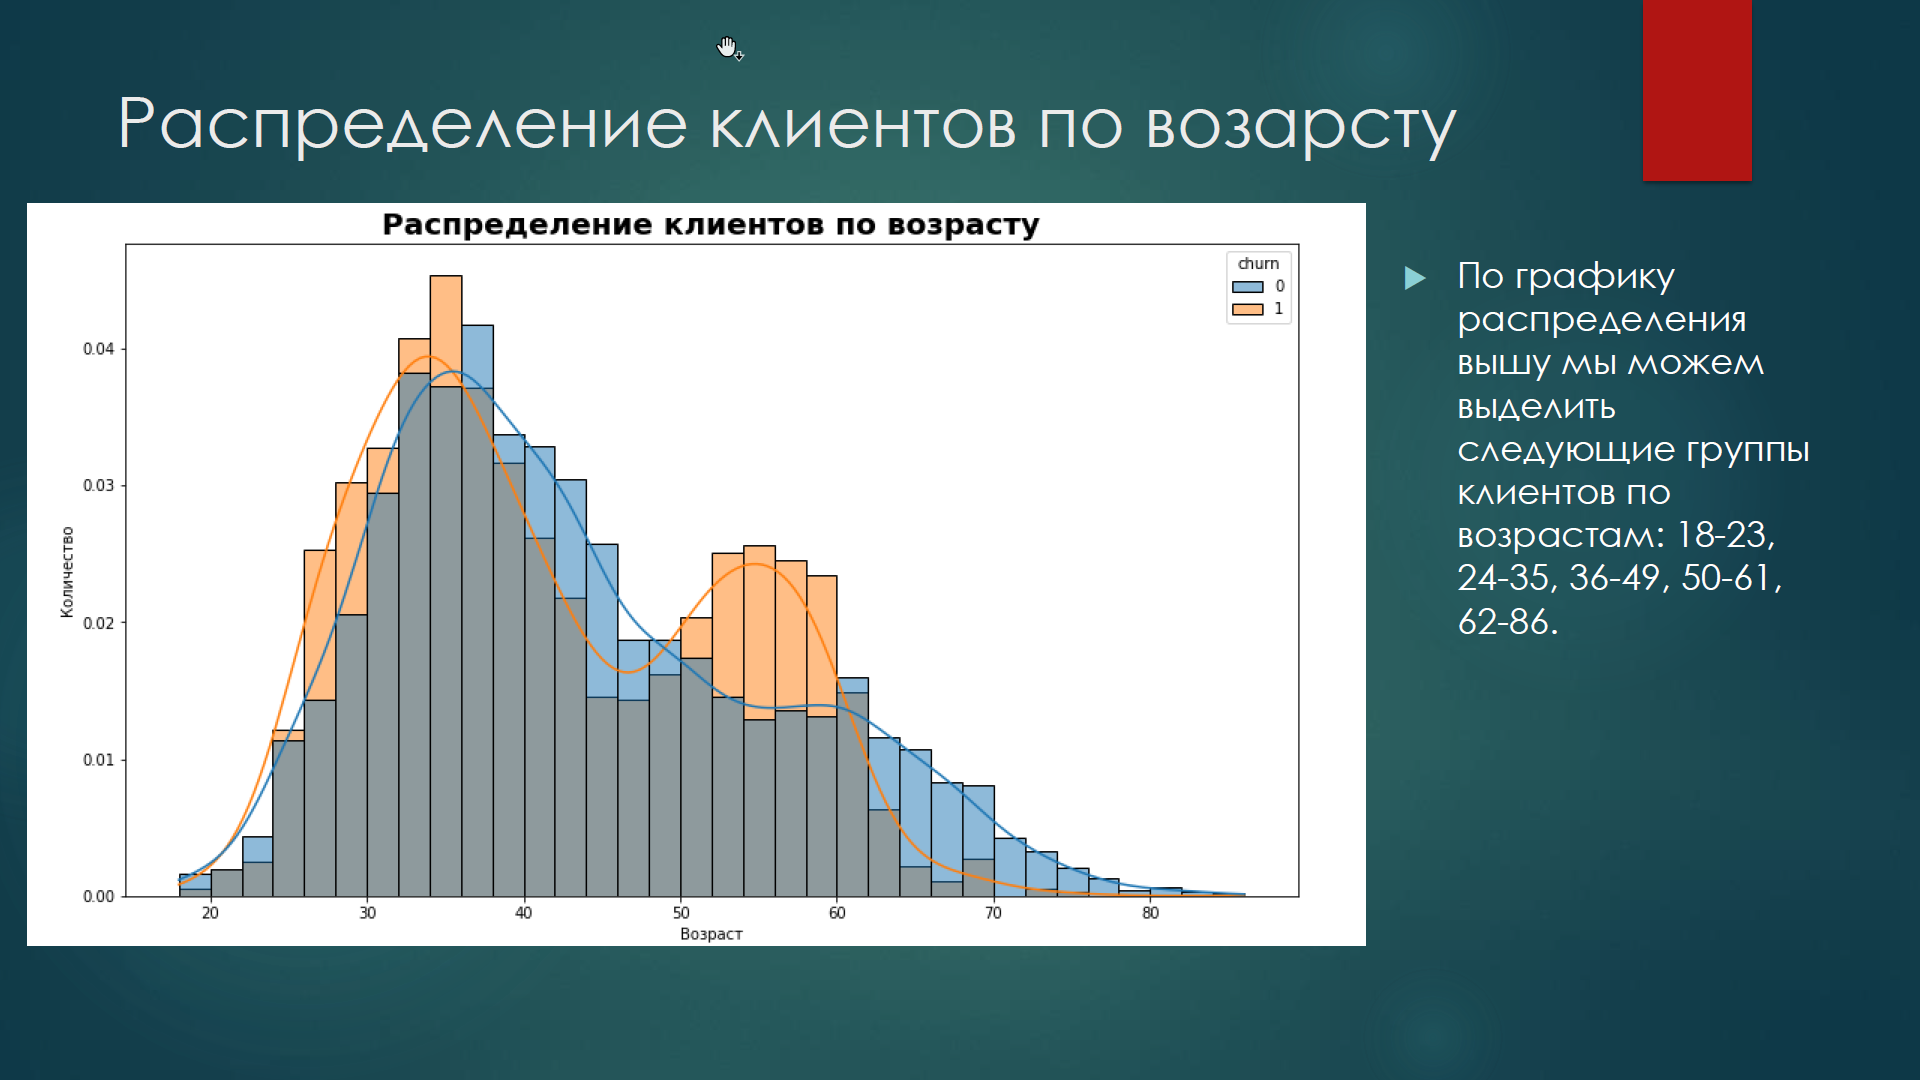

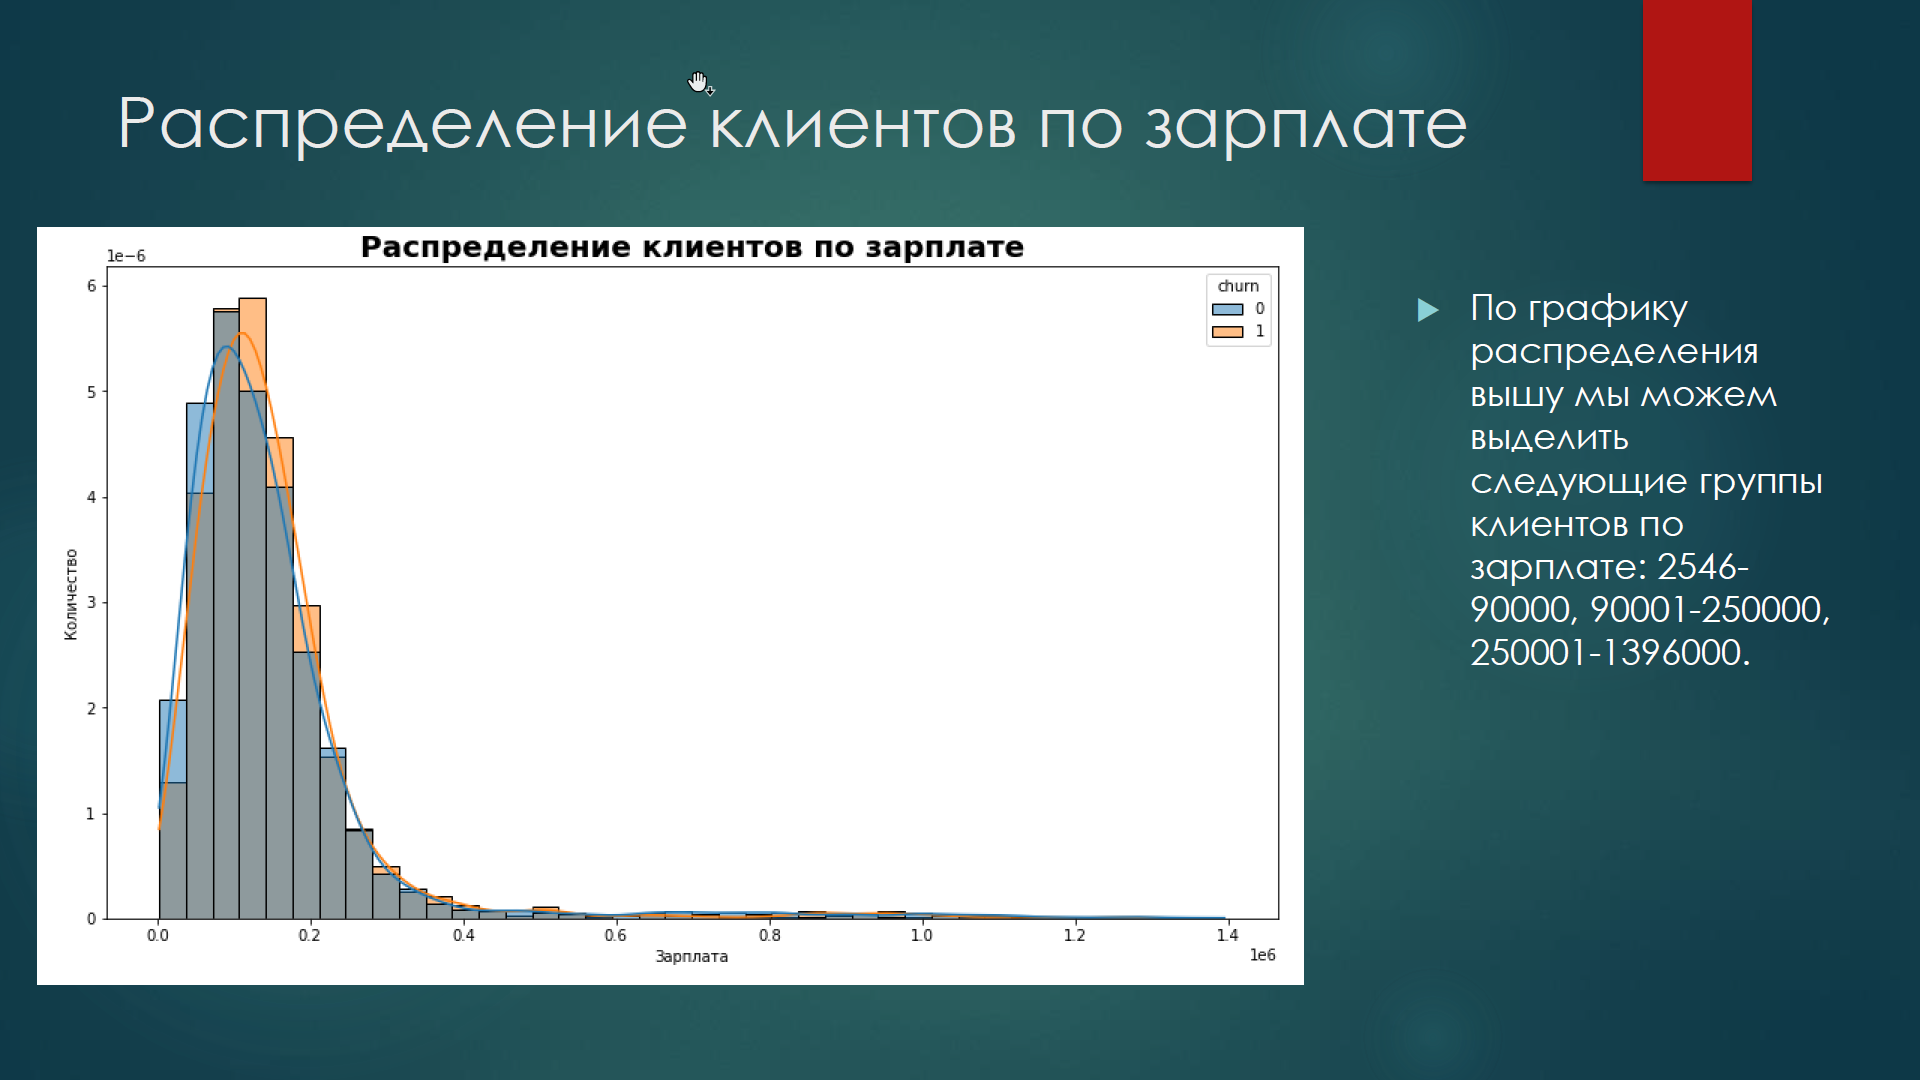

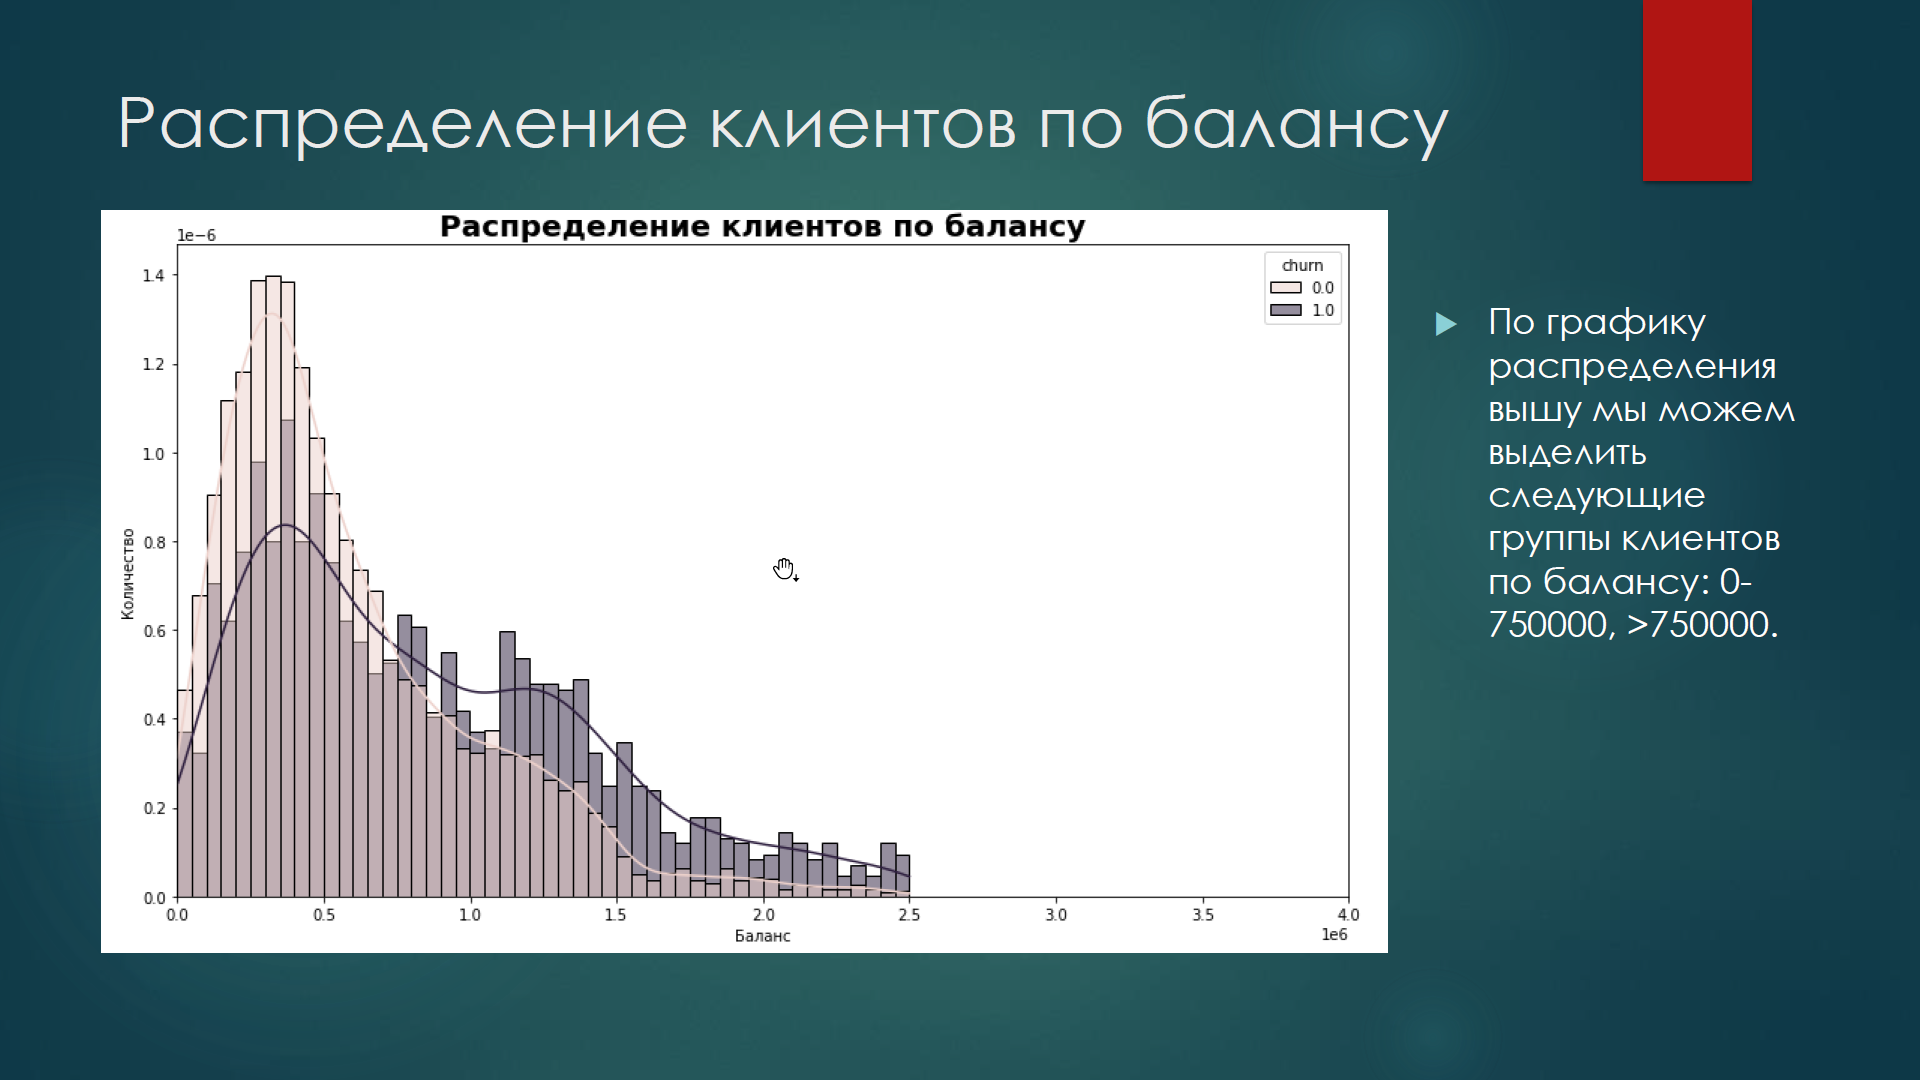

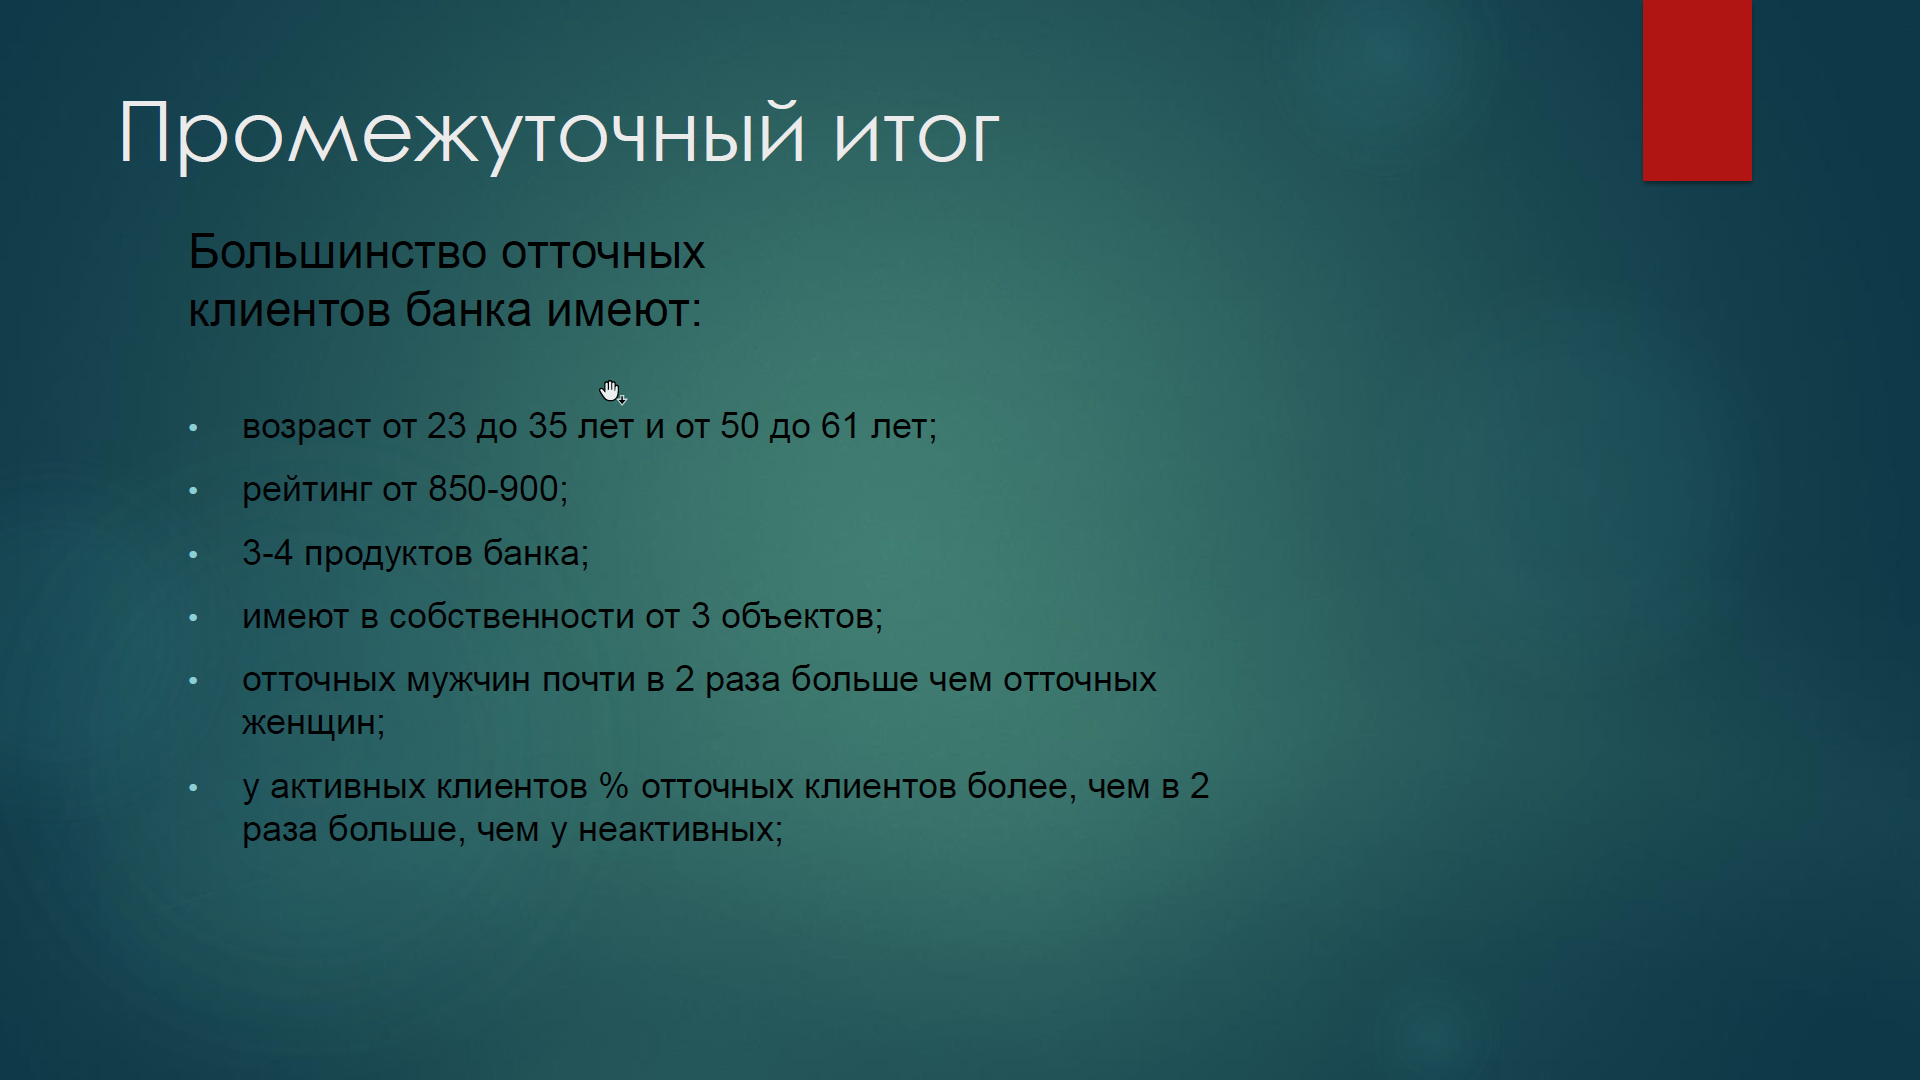

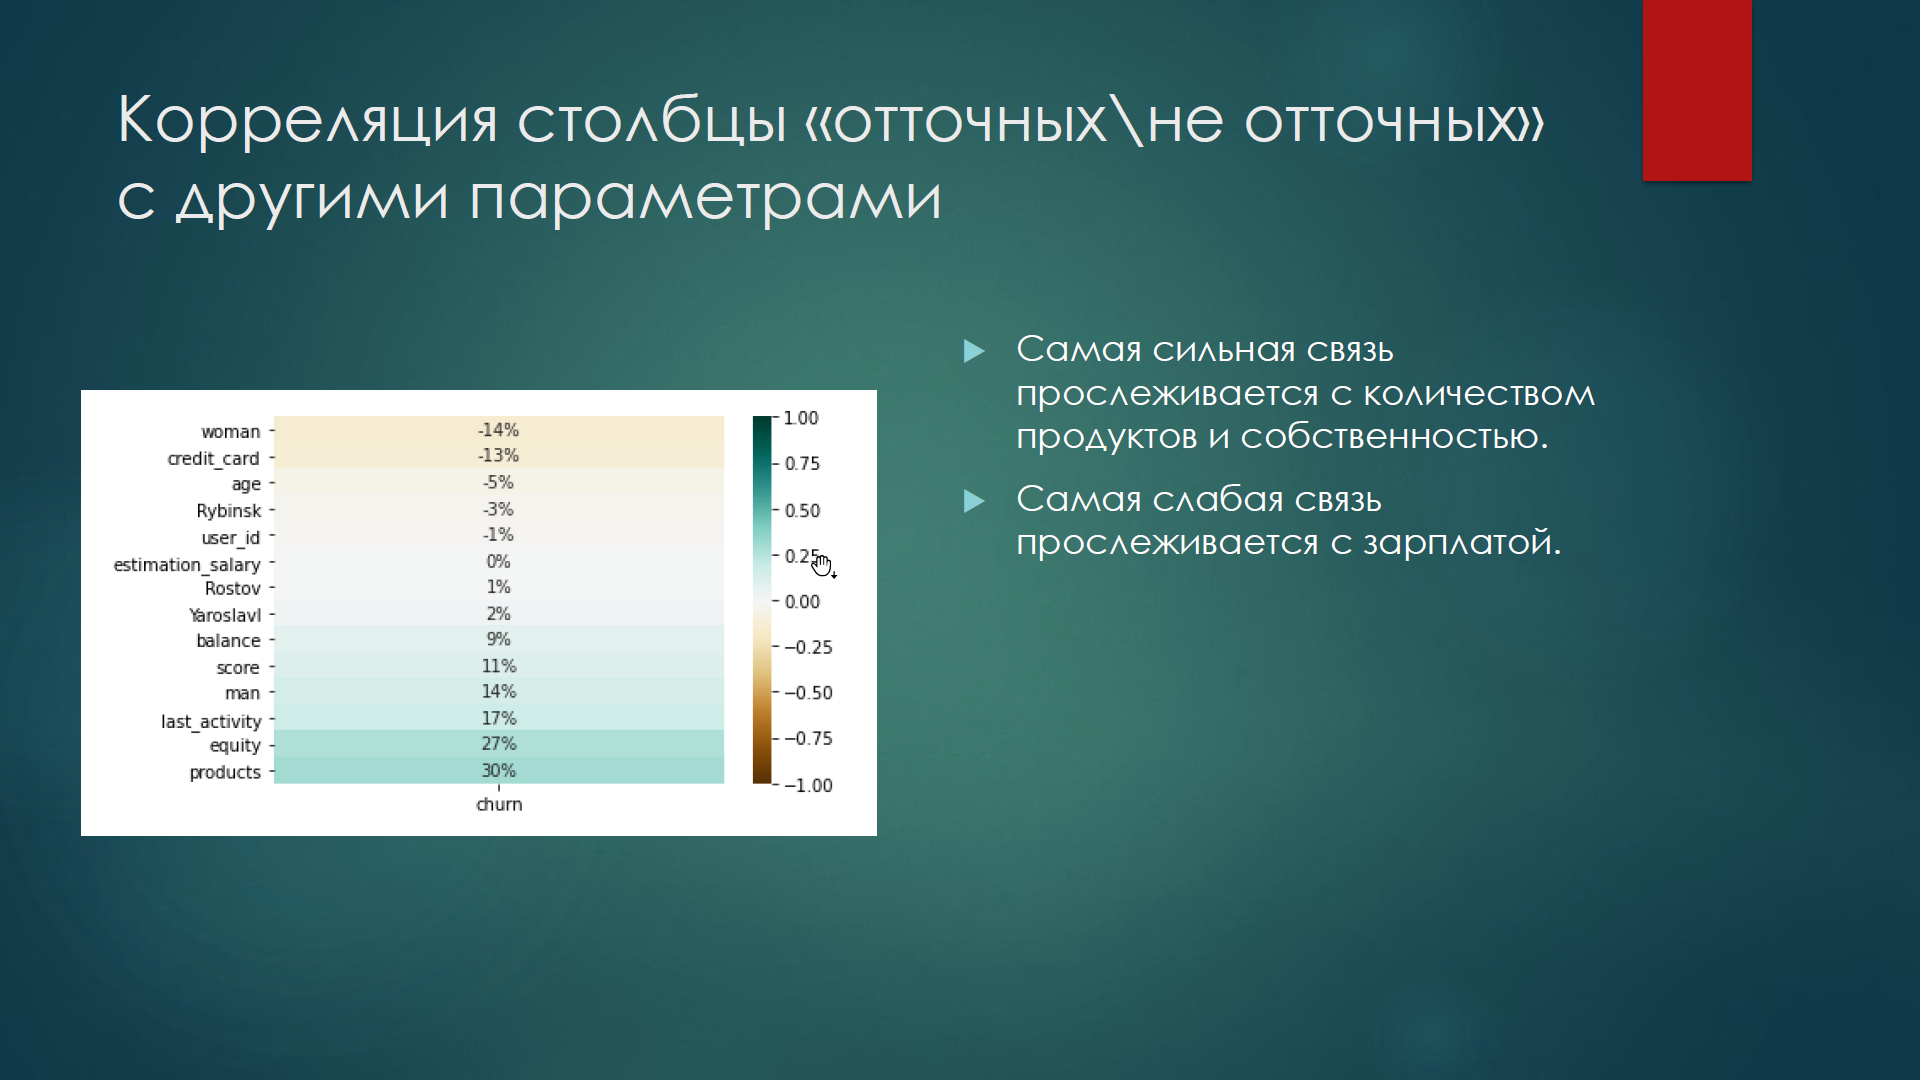

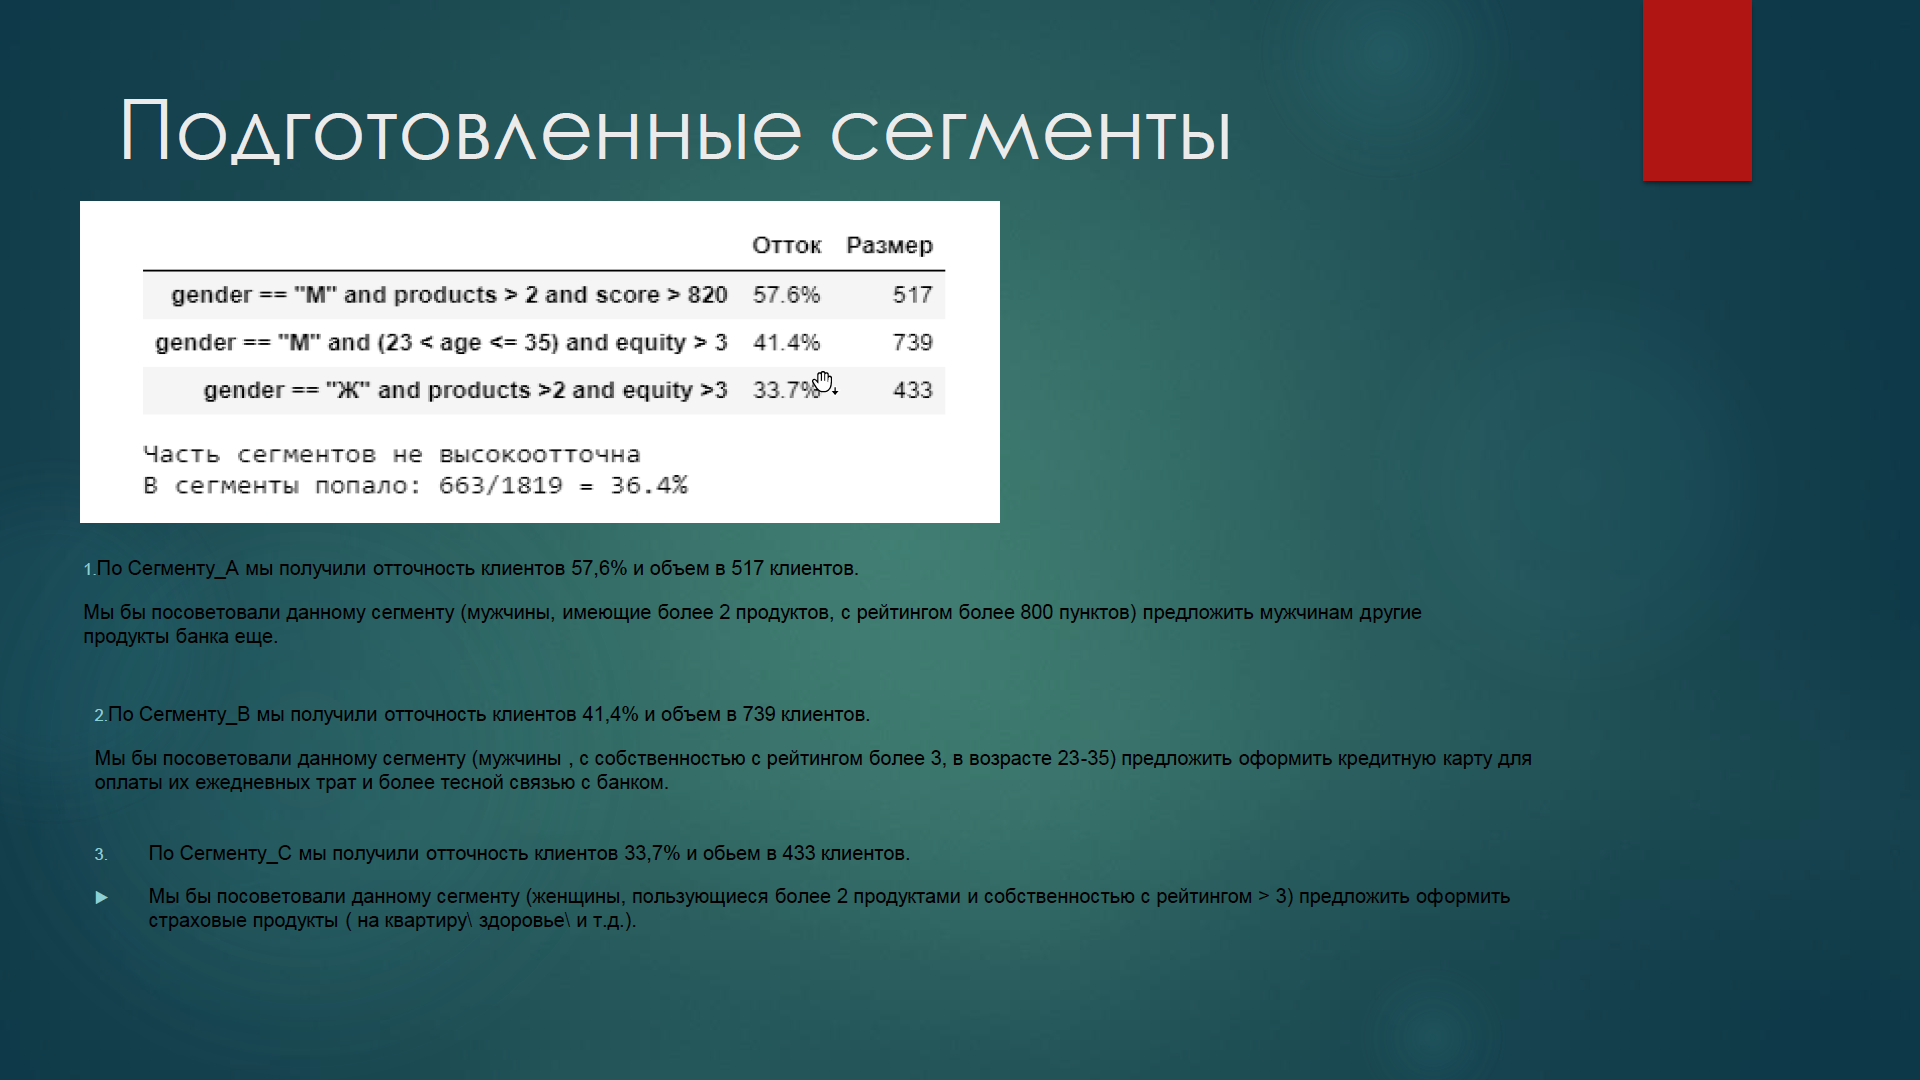

# План работы:

Данные для работы мы будем брать из файла: '/bank_scrooge.csv'. О качестве данных ничего неизвестно, поэтому перед тем как приступить к анализу данных, понадобиться обзор данных.


1. Выгрузка и предварительный анализ данных
2. Предобработка данных
 - анализ пропусков
 - анализ дубликатов
 - преобразование названия колонок
 - добавление необходимых столбцов для дальнейшей исследовательской работы (кодирование столбцов с указанием пола и города)
3. Анализ данных
 - анализ общах показателей датасета
 - сравнение портретов уходящих и не уходящих;
 - распределение характеристик (непрерывных и категориальных), в т.ч. в разрезе оттока;
 - уровни оттока по категориям; 
 - категоризация по возрасту клиентов
 - категоризация по рейтингу клиентов
 - категоризация по зарлпате клиентов
 - сравнение портретов по категоризованным параметрам 
 - графики по уровню оттока по категоризованным переменным 
 - корреляционный анализ (с использование графика "тепловая карта").
4. Проверка статистических гипотез
- гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались;
- гипотеза различия рейтинга между теми клиентами, что ушли и теми, что остались
- гипотеза различий наличия кредитных карт между теми клиентам, что ушли и теми, что остались
5. Промежуточный итог о том, какие показатели стратегически влияют на отток (какие признаки стратегическим образом влияют на отток и какие значения или интервалы этих признаков связаны с оттоком)
6. Сегментация на основе стратегических показателей (Выделить не мелкие, но компактные высокоотточные сегменты, посчитать размер и отток сегментов, приоритизировать их).
7. Выводы и рекомендации для заказчика (конкретные рекомендации по приоритетным сегментам)

Задание: (набор №1)

Постройте диаграмму, отражающую количество клиентов в зависимости от числа используемых продуктов.
Добавьте на тот же график индикатор процента ушедших клиентов (уровень оттока среди владельев данного числа продуктов).
Добавьте фильтр дашборда по городу.

Ссылка на дашборд: https://public.tableau.com/authoring/__16901182185720/1_1#1

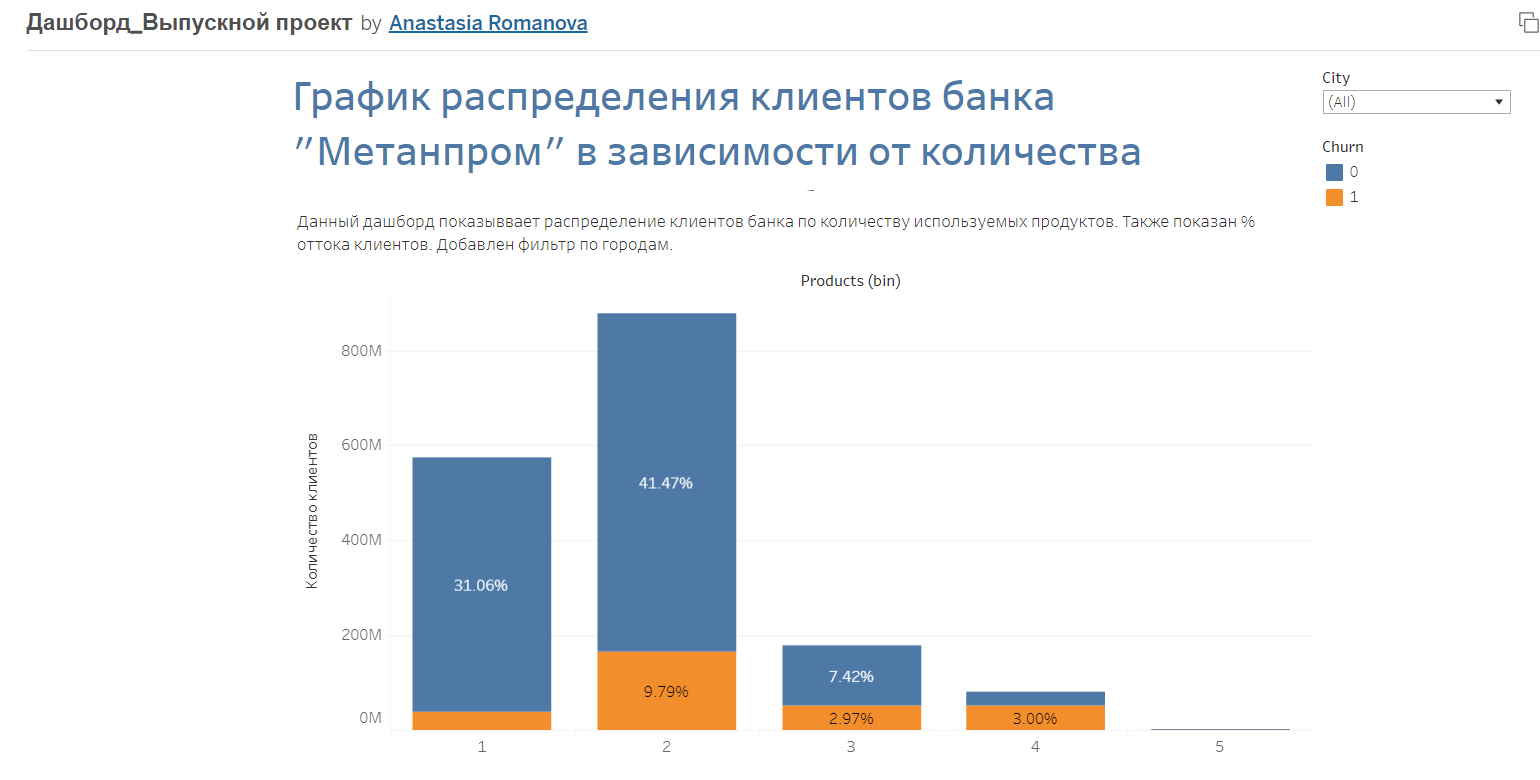

## Выгрузка и предварительный анализ данных

In [97]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px
import plotly
import plotly.graph_objs as go
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()


In [98]:
!pip install phik 

import phik 
from phik.report import plot_correlation_matrix
from phik import report
from phik import resources

In [99]:
from statsmodels. stats.proportion import proportions_ztest


In [100]:
clients = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
clients.head(10)

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   
5  202305  856.0    Рыбинск      М  56.0       4   863687.24         3   
6  177259  807.0  Ярославль      Ж  39.0       3   405042.44         3   
7  218868  825.0  Ярославль      Ж  38.0       4   458145.40         2   
8  211686  923.0  Ярославль      М  54.0       5  1206337.87         2   
9  133130  906.0  Ярославль      Ж  67.0       0         NaN         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1  
5            1              0   156619.80      0  
6            0              1   103838.32      0  
7            1              1    68085.48      0  
8            1              0   155371.79      0  
9            0              1   238055.53      0

In [101]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [102]:
clients.columns #выводим перечень названий столбцов таблицы clients

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

При первичном ознакомлении с данными, мы увидели, что в таблицы присутствуют пропуски в двух колонках: с возрастом и балансом. Некоторые названия столбцов в таблицы необходимо привести в нижнему регистру. 

## Предобработка данных

### Анализ пропусков

In [103]:
clients.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [104]:
pd.DataFrame(round(clients.isna().mean()*100,)).style.background_gradient('coolwarm') #пропуски в процентном соотношении

По таблице выше мы видим, что наше исследование влияние оказывают пропуски по столбцу с балансом, которые составляют 23%. Мы приняли решение пока не заполнять эти пропуски.
Пропуски в таблице с возрастом составляют менее 1%, поэтому влияния на наше исследование не оказывают и мы решили удалить строки  с 0-значениями по данному столбцу.

In [105]:
bank_clients = clients.dropna(subset=['age'])

In [106]:
bank_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  EST_SALARY     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


In [107]:
bank_clients[bank_clients['balance'].isna()][['churn','city','products']].value_counts()

churn  city       products
0      Ярославль  1           1244
       Рыбинск    1            481
       Ростов     1            201
       Ярославль  2            187
       Рыбинск    2             96
       Ростов     2             31
       Ярославль  3             19
1      Ярославль  1              6
0      Рыбинск    3              5
       Ростов     3              2
1      Ярославль  3              2
       Ростов     1              1
       Рыбинск    0              1
                  1              1
                  2              1
                  3              1
dtype: int64

In [108]:

bank_clients[bank_clients['balance'].isna()][['churn','gender','equity']].value_counts()

churn  gender  equity
0      М       0         1192
       Ж       0          960
       М       1           70
       Ж       1           44
1      М       0           10
       Ж       0            2
               3            1
dtype: int64

In [109]:

bank_clients[bank_clients['balance'].isna()][['churn','credit_card']].value_counts()

churn  credit_card
0      1              1847
       0               419
1      1                11
       0                 2
dtype: int64

Согласно таблицам выше, можно предположить следующие выводы:

Большая часть пропущенных значений по колонке с балансом относятся к текущим мужчинам- клиентам, которые имеют кредитную карту, пользуются одним банковским продуктом (кр. картой?), и имеют рейтинг по собственному имуществу -0. 
Соответственно, либо это клиенты - должники, пользующиеся только кредитными картами, либо текущие клиенты, но которые по каким-то причинам уже собираются уходить (переводят деньги в другие банки например)

### Анализ дубликатов

In [110]:
bank_clients.duplicated().sum() #поиск явных дубликатов

0

In [111]:
bank_clients[bank_clients['USERID'].duplicated(keep=False)].sort_values(by='USERID').head(10)

USERID  score       city gender   age  equity     balance  products  \
1893  116540  883.0    Рыбинск      Ж  55.0       1   362756.49         3   
7694  116540  887.0  Ярославль      Ж  38.0       0         NaN         1   
4866  117943  855.0    Рыбинск      Ж  32.0       6  1036832.93         4   
7542  117943  880.0  Ярославль      Ж  40.0       0         NaN         1   
5863  120258  908.0    Рыбинск      Ж  38.0       4  2213581.63         2   
5896  120258  905.0  Ярославль      М  30.0       0         NaN         1   
1411  123461  829.0  Ярославль      Ж  59.0       0    96222.44         2   
8638  123461  934.0    Рыбинск      М  34.0       0         NaN         2   
9775  124450  758.0    Рыбинск      Ж  36.0       0    73574.07         2   
8164  124450  859.0  Ярославль      Ж  38.0       6   516811.20         1   

      credit_card  last_activity  EST_SALARY  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
4866            1              1   107792.71      1  
7542            1              0   137718.93      0  
5863            0              1   160327.77      1  
5896            1              1   146427.96      0  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
9775            0              1    79963.59      0  
8164            1              1    95144.63      1

Мы обнаружили неявные дубликаты по столбцу с USERID, но по таблице выше мы видим, что клиенты банка при этом разные ( отличается пол, баланс, возраст и прочие показатели)

### Преобразование названия колонок 

In [112]:
bank_clients = bank_clients.rename(columns={'USERID':'user_id','EST_SALARY':'estimation_salary'})

In [113]:
bank_clients.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'estimation_salary',
       'churn'],
      dtype='object')

### Добавление необходимых столбцов для дальнейшей исследовательской работы (кодирование столбоцв с указанием пола и города)

In [114]:
bank_clients.head(5)

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  estimation_salary  churn  
0            0              1           75719.14      1  
1            1              0           86621.77      0  
2            1              1          107683.34      0  
3            0              1          174423.53      1  
4            1              0           67353.16      1

In [115]:
bank_clients['city'].unique()#находим количество городов, из которых наши клиенты, чтобы определить количество необходимых колонок

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [116]:
bank_clients['city2'] = bank_clients['city']
bank_clients['gender2'] = bank_clients['gender']

In [117]:
bank_clients=pd.get_dummies(bank_clients, columns=['gender2', 'city2'])

In [118]:
bank_clients = bank_clients.rename(columns={'gender2_М':'man','gender2_Ж':'woman','city2_Ростов':'Rostov','city2_Рыбинск':'Rybinsk','city2_Ярославль':'Yaroslavl'})

In [119]:
bank_clients.head(10)

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   
5   202305  856.0    Рыбинск      М  56.0       4   863687.24         3   
6   177259  807.0  Ярославль      Ж  39.0       3   405042.44         3   
7   218868  825.0  Ярославль      Ж  38.0       4   458145.40         2   
8   211686  923.0  Ярославль      М  54.0       5  1206337.87         2   
9   133130  906.0  Ярославль      Ж  67.0       0         NaN         1   

   credit_card  last_activity  estimation_salary  churn  woman  man  Rostov  \
0            0              1           75719.14      1      1    0       0   
1            1              0           86621.77      0      1    0       0   
2            1              1          107683.34      0      1    0       0   
3            0              1          174423.53      1      1    0       0   
4            1              0           67353.16      1      0    1       0   
5            1              0          156619.80      0      0    1       0   
6            0              1          103838.32      0      1    0       0   
7            1              1           68085.48      0      1    0       0   
8            1              0          155371.79      0      0    1       0   
9            0              1          238055.53      0      1    0       0   

   Rybinsk  Yaroslavl  
0        1          0  
1        1          0  
2        1          0  
3        0          1  
4        0          1  
5        1          0  
6        0          1  
7        0          1  
8        0          1  
9        0          1

In [120]:
### КОД РЕВЬЮЕРА
df = bank_clients
df.products.min()

0

In [121]:
bank_clients = bank_clients.loc[bank_clients['products'] > 0] #сделали фильтр на редкие значения по продуктам

In [122]:
#bank_clients['products'].min()

## Анализ данных

### Анализ общих показателей датасета

In [123]:
bank_clients.iloc[:,1:12].describe(include='all').T.fillna('-')

count unique        top  freq           mean  \
score              9973.0      -          -     -     848.671212   
city               9973.0      3  Ярославль  5875              -   
gender             9973.0      2          М  4991              -   
age                9973.0      -          -     -      42.730773   
equity             9973.0      -          -     -       2.630803   
balance            7695.0      -          -     -  827245.587515   
products           9973.0      -          -     -       1.871653   
credit_card        9973.0      -          -     -       0.680237   
last_activity      9973.0      -          -     -       0.522912   
estimation_salary  9973.0      -          -     -  147799.115241   
churn              9973.0      -          -     -       0.182292   

                              std     min         25%        50%         75%  \
score                   65.393153   642.0       802.0      853.0       900.0   
city                            -       -           -          -           -   
gender                          -       -           -          -           -   
age                     12.175166    18.0        33.0       40.0        51.0   
equity                    1.98006     0.0         0.0        3.0         4.0   
balance            1980327.409726     0.0  295698.715  524295.33  980051.215   
products                 0.792547     1.0         1.0        2.0         2.0   
credit_card              0.466408     0.0         0.0        1.0         1.0   
last_activity              0.4995     0.0         0.0        1.0         1.0   
estimation_salary   139287.075269  2546.3    75252.02  119643.06   174499.96   
churn                    0.386105     0.0         0.0        0.0         0.0   

                            max  
score                    1000.0  
city                          -  
gender                        -  
age                        86.0  
equity                      9.0  
balance            119113552.01  
products                    5.0  
credit_card                 1.0  
last_activity               1.0  
estimation_salary    1395064.45  
churn                       1.0

Основные характеристики клиентов банка:

    - больше всего клиентов в городе Ярославле (5,9 тыс чел);
    - количество мужчин и женщин примерно одинаковое, с небольшим преимуществом мужчин;
    - возраст клиентов банка "Метанпром" от 18 лет до 86 лет;
    - среднее количество обладаемого имущества у клиентов банка - 3 объекта;
    - среднее количество используемых банковских продуктов клиентами банка - 2 продукта;
    - кредитную карты имеют 68% клиентов банка;
    - 75% клиентов имеют скоринг 802, 25% клиентов имеют скоринг 900;
    - большая часть клиентов в последнее время проявляли активность;
    -средний показатель оттока равен 18%.

### Сравнение портретов уходящих и не уходящих 

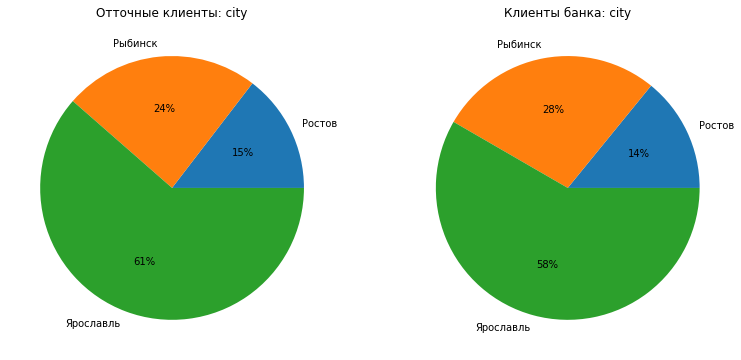

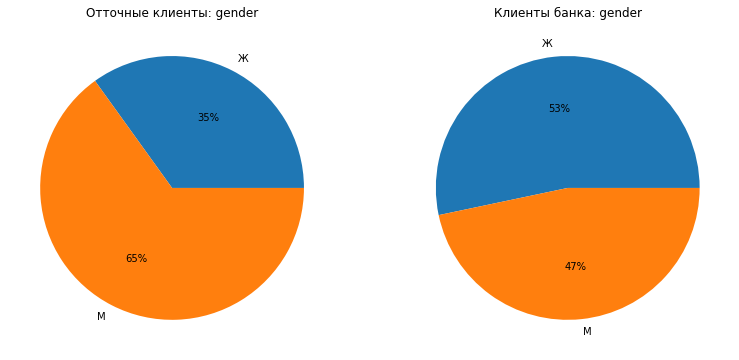

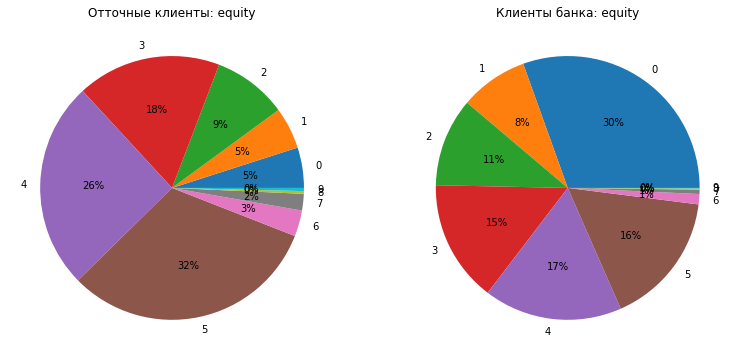

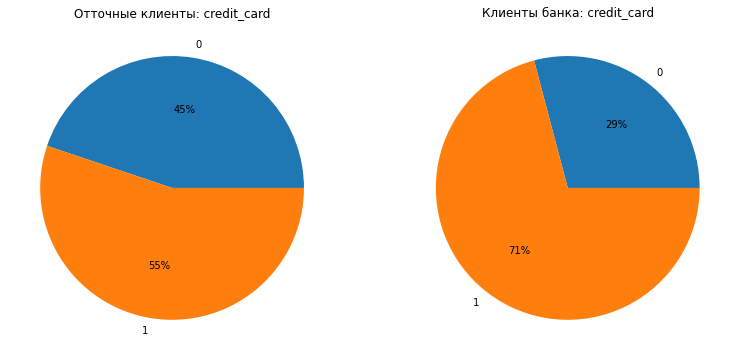

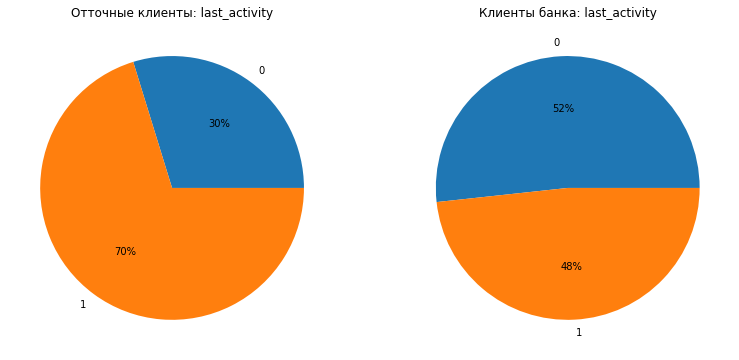

In [124]:
for col in ['city', 'gender', 'equity', 'credit_card', 'last_activity']:
    group = bank_clients.groupby([col,'churn']).agg({'user_id':'count'}).reset_index()
    churn = group[group['churn'] ==1]
    non_churn = group[group['churn']==0]

    fig, (ax1, ax2)=plt.subplots(1,2, figsize=(13,10))

    ax1.pie(churn['user_id'], labels = churn[col], autopct = '%.0f%%')
    ax2.pie(non_churn['user_id'], labels = non_churn[col], autopct = '%.0f%%')

    ax1.set_title(f'Отточные клиенты: {col}')
    ax2.set_title(f'Клиенты банка: {col}')
plt.show()
    

По сравнению портретов отточных и не отточных клиентов можно сказать следующее:
 - по городам сильного отличия нет
 - по полу: у отточных клиентов преобладает мужской пол;
 - активнойсть: у отточных клиентов преобладает наличие активности  за последнее время;
 - собственность: у отточных клиентов преобладает наличие собственности с уровнем 5, у клиентов банка - 0.

### Распределение характеристик (непрерывных и категориальных) , в т.ч. в разрере оттока

city  clients
0  Ярославль     5875
1    Рыбинск     2682
2     Ростов     1416

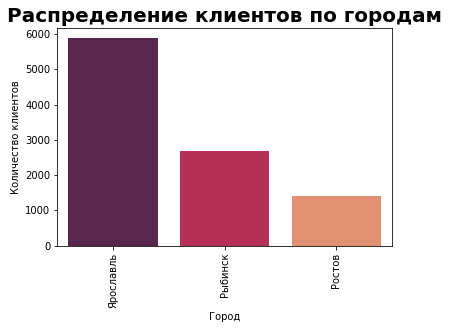

In [125]:
city=bank_clients.groupby('city')['user_id'].count().sort_values(ascending=False).reset_index()
city.columns=['city', 'clients']
display(city)

sns.barplot(x=city['city'], y=city['clients'], palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по городам', fontsize=20, fontweight = 'bold');

Как мы видим из графика выше, большая часть клиентов банка "Метанпром" (более 50%) из Ярославля.

In [126]:
bank_clients['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

In [127]:
#bank_clients.boxplot(column=['balance'], by='gender')
#plt.xticks(rotation=45);

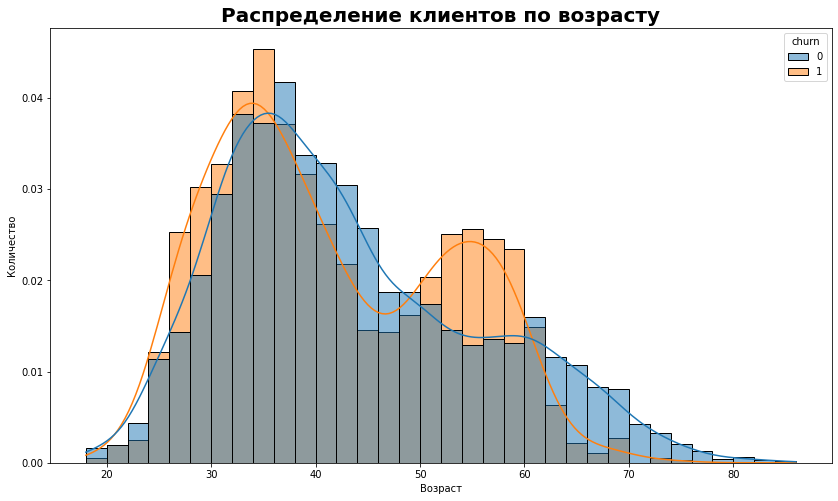

In [128]:
#строим график распределния по возрасту клиента
plt.figure(figsize=(14,8))
age = sns.histplot(data=bank_clients, x = bank_clients['age'], hue='churn', kde=True, stat='density', common_norm=False, binwidth=2)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение клиентов по возрасту', fontsize=20, fontweight = 'bold');

По графику распределения вышу мы можем выделить следующие группы клиентов по возрастам: 18-23, 24-35, 36-49, 50-61, 62-86.

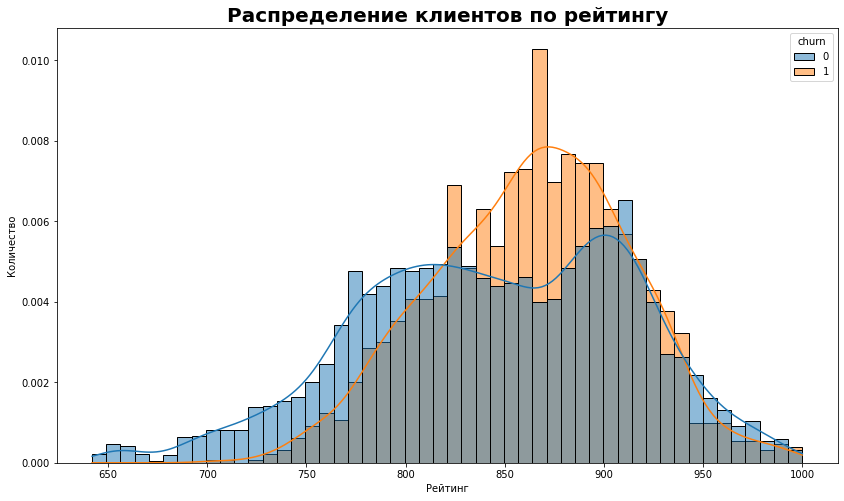

In [129]:
#строим график распределния по рейтингу клиентов
plt.figure(figsize=(14,8))
score = sns.histplot(data=bank_clients, x = bank_clients['score'], hue='churn', kde=True, stat='density', common_norm=False, bins=50)
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.title('Распределение клиентов по рейтингу', fontsize=20, fontweight = 'bold');

По графику распределения вышу мы можем выделить следующие группы клиентов по рейтингу: 642-820, 821-935, 936-1000.

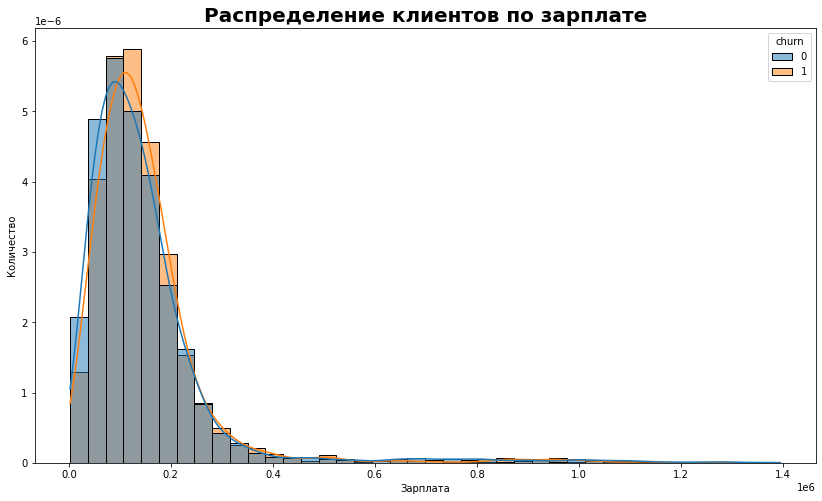

In [130]:
#строим график распределния по зарплате клиента
plt.figure(figsize=(14,8))
salary = sns.histplot(data=bank_clients, x = bank_clients['estimation_salary'], hue='churn', kde=True, stat='density', common_norm=False, bins=40)
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.title('Распределение клиентов по зарплате', fontsize=20, fontweight = 'bold');

По графику распределения вышу мы можем выделить следующие группы клиентов по зарплате: 2546-90000, 90001-250000, 250001-1396000.

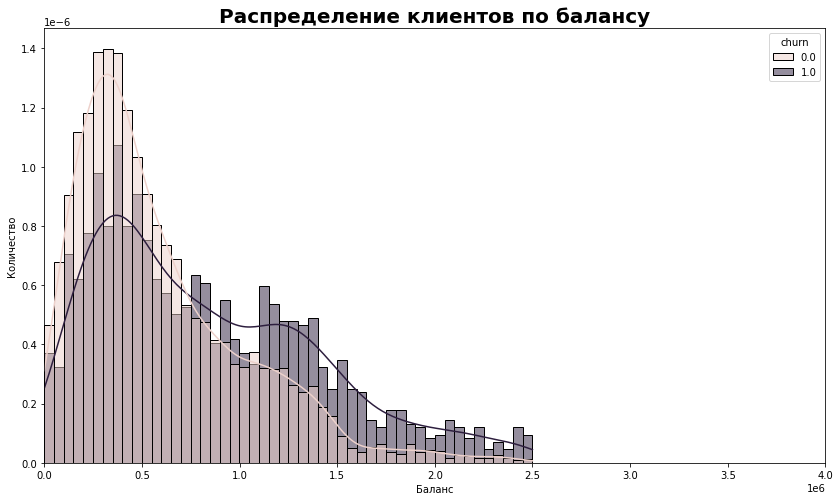

In [131]:
# уберем аномальные значения, чтобы график был читаемым
bc = bank_clients[bank_clients['balance'] <= 2500000]
#построим гистограмму
plt.figure(figsize=(14,8))
balance = sns.histplot(data=bc, x = bank_clients['balance'], hue='churn', kde=True, stat='density', common_norm=False, bins=50)
plt.xlim([0,4000000])
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.title('Распределение клиентов по балансу', fontsize=20, fontweight = 'bold');

По графику распределения вышу мы можем выделить следующие группы клиентов по балансу: 0-750000, >750000.

### Уровни оттока по категориям

In [132]:
#for col in ['city', 'gender','credit_card','last_activity','equity']:
    #plt.figure(figsize=(15,7))
  #  ax=sns.countplot(data=bank_clients, x=col, hue='churn');
     #av_churn = bank_clients['churn'].mean()*100 #расчет ср оттока по всему банку
   # perc = bank_clients.pivot_table(index=col, columns='churn', values='user_id', aggfunc='mean')
   # perc['клиенты банка'] = round((perc[0] / (perc[0] + perc[1]))*100, 2)
    #perc['не клиенты банка'] = 100 - perc['клиенты банка']
    #perc['разница,%'] = ((perc[1]-perc[0])/perc[0]).round(2)*100
    #perc.shape[0]
#print(perc)
 #   print(av_churn)
   # plt.title(f'Отток по параметру {col}', fontsize = 15)
   # plt.legend(['клиенты банка', 'не клиенты банка'], fontsize = 10)
   # plt.ylabel('Количество клиентов')
   # plt.axhline(av_churn, color='red', linestyle='--', label='Средний отток') #добавление линии со ср оттоком по банку
   # plt.legend()
    #plt.show();

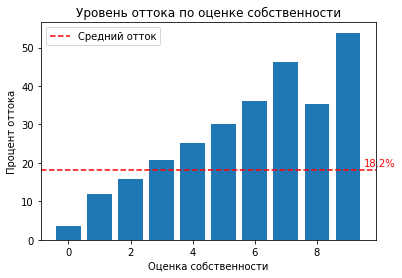

In [133]:
# уровни оттока
churn_level = bank_clients.groupby('equity')['churn'].mean() * 100

# уровень среднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level + 1, f'{avg_churn_level:.1f}%', ha='left', color='red')

plt.title('Уровень оттока по оценке собственности')
plt.xlabel('Оценка собственности')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

Мы видим, что уровень оттока превышает средний по банку после оценки собственности =>3.

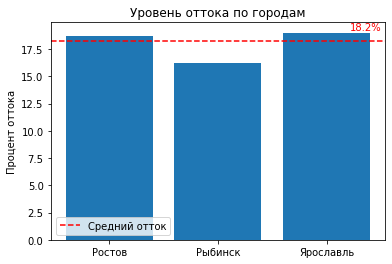

In [134]:
# уровни оттока
churn_level = bank_clients.groupby('city')['churn'].mean() * 100

# уровень среднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по городам')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

Мы видим,  что уровень оттока выше среднего наблюдается в городах: Ростов и Ярославль, но не сильно его превышает.

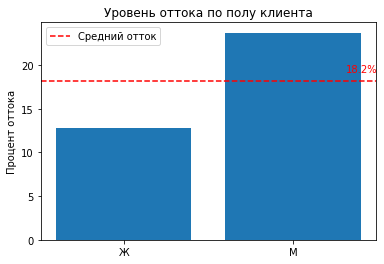

In [135]:
# уровни оттока
churn_level = bank_clients.groupby('gender')['churn'].mean() * 100

# уровень среднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по полу клиента')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

    Мы видим, что уровень оттока превышат средний по полу - мужчины.

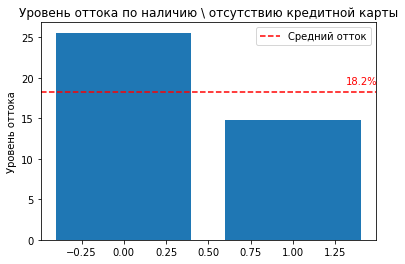

In [136]:
# уровни оттока
churn_level = bank_clients.groupby('credit_card')['churn'].mean() * 100

# уровень среднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по наличию \ отсутствию кредитной карты')
plt.ylabel('Уровень оттока')

plt.legend()
plt.show()

Мы видим, что уровень оттока превышает средний по клиентам, у которых нет кредитной карты.

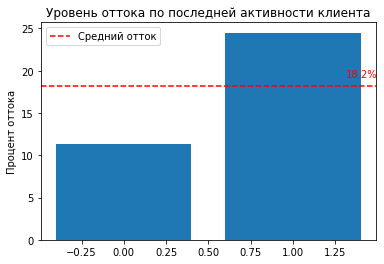

In [174]:
# уровни оттока
churn_level = bank_clients.groupby('last_activity')['churn'].mean() * 100

# уровень среднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по последней активности клиента')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

    Мы видим, что уровень оттока превышает средний по клиентам, у которых раблюдалась активность в последнее время.

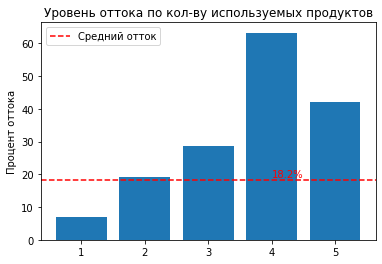

In [138]:
# уровни оттока
churn_level = bank_clients.groupby('products')['churn'].mean() * 100

# уровень среднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по кол-ву используемых продуктов')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

Мы видим, что уровень оттока выше среднего наблюдается по клиентам,  которые пользуются продуками >=3.


### Категоризация по возрасту клиентов

In [139]:
def categorize_age(age):
    try:
        if 18 <= age <= 22:
            return '18-23'
        elif 23 <= age <= 35:
            return '23-35'
        elif 36 <= age <= 49:
            return '36-49'
        elif 50 <= age <= 61:
            return '50-61'
        elif age >= 62:
            return '62-86'
    except:
        pass

In [140]:
bank_clients['age_category'] = bank_clients['age'].apply(categorize_age)

/tmp/ipykernel_31/1462824628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_clients['age_category'] = bank_clients['age'].apply(categorize_age)


### Категоризация по рейтингу клиентов

In [141]:
def categorize_score(score):
    try:
        if 642 <= score <= 820:
            return 'низкий'
        elif 821 <= score <= 935:
            return 'средний'
        elif 936 <= score <= 999:
            return 'высокий'
    except:
        pass

In [142]:
bank_clients['score_category'] = bank_clients['score'].apply(categorize_score)

/tmp/ipykernel_31/3411224848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_clients['score_category'] = bank_clients['score'].apply(categorize_score)


### Категоризация по зарплате клиентов

In [143]:
def categorize_salary(salary):
    try:
        if 2546 <= salary <= 90000:
            return 'низкая'
        elif 90001 <= salary <= 250000:
            return 'средняя'
        elif 250001 <= score:
            return 'высокая'
    except:
        pass

In [144]:
bank_clients['salary_category'] = bank_clients['estimation_salary'].apply(categorize_salary)

/tmp/ipykernel_31/474857265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_clients['salary_category'] = bank_clients['estimation_salary'].apply(categorize_salary)


In [145]:
bank_clients.head(5)

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  estimation_salary  churn  woman  man  Rostov  \
0            0              1           75719.14      1      1    0       0   
1            1              0           86621.77      0      1    0       0   
2            1              1          107683.34      0      1    0       0   
3            0              1          174423.53      1      1    0       0   
4            1              0           67353.16      1      0    1       0   

   Rybinsk  Yaroslavl age_category score_category salary_category  
0        1          0        23-35        средний          низкая  
1        1          0        36-49        средний          низкая  
2        1          0        23-35        средний         средняя  
3        0          1        50-61        средний         средняя  
4        0          1        23-35         низкий          низкая

### Сравнение портретов по категоризованным параметрам

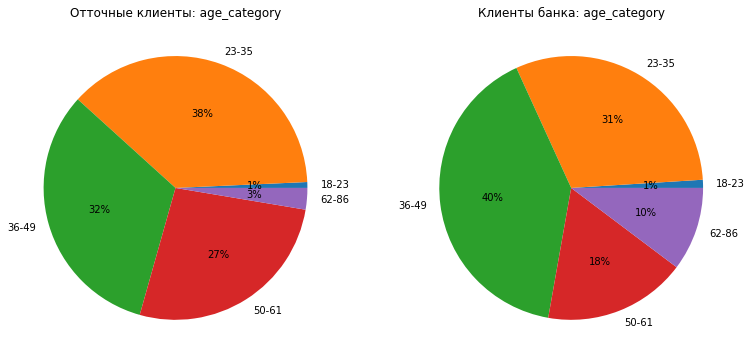

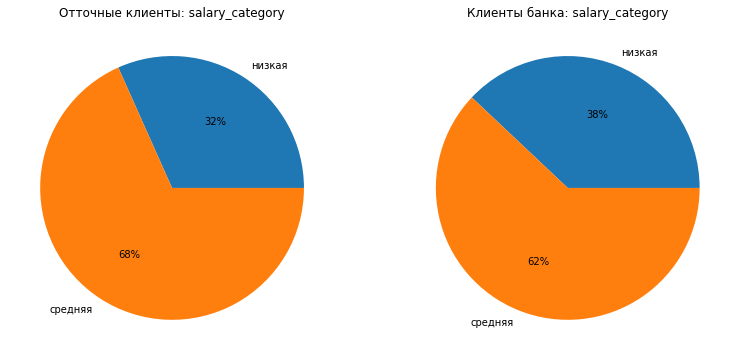

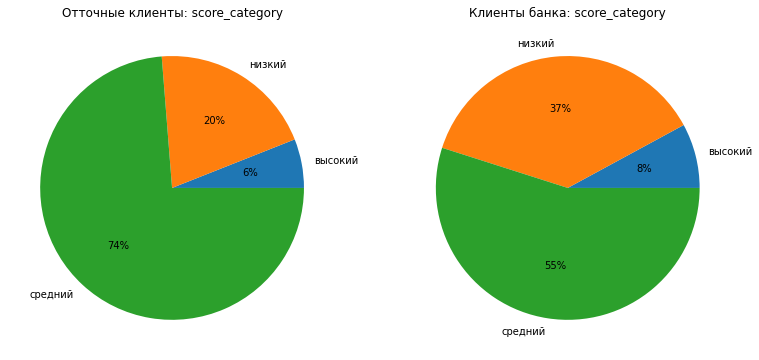

In [172]:
for col in ['age_category', 'salary_category', 'score_category']:
    group = bank_clients.groupby([col,'churn']).agg({'user_id':'count'}).reset_index()
    churn = group[group['churn'] ==1]
    non_churn = group[group['churn']==0]

    fig, (ax1, ax2)=plt.subplots(1,2, figsize=(13,10))

    ax1.pie(churn['user_id'], labels = churn[col], autopct = '%.0f%%')
    ax2.pie(non_churn['user_id'], labels = non_churn[col], autopct = '%.0f%%')

    ax1.set_title(f'Отточные клиенты: {col}')
    ax2.set_title(f'Клиенты банка: {col}')
plt.show()
    

Как мы видим из сранения портретов ушедших и не ушедших клиентов: параметры по заработной плате отличались не сильно,
рейтинг: у  ушедших клиентов преобладал средний рейтинг,
возрастная категория: у ушедших клиентов преобладали группы 23-35 лет.

### Графики по уровню оттока по категоризованным переменным

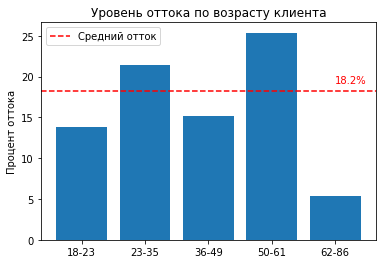

In [146]:
# уровни оттока
churn_level = bank_clients.groupby('age_category')['churn'].mean() * 100

# уровень реднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по возрасту клиента')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

Мы видим, что уровень оттока выше среднего наблюдается у клиентов возрастных групп: 23-35,  50-61

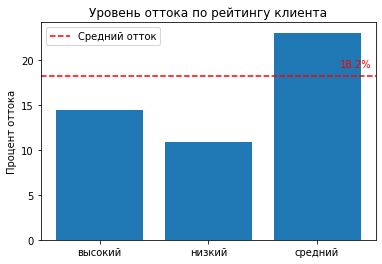

In [147]:
# уровни оттока
churn_level = bank_clients.groupby('score_category')['churn'].mean() * 100

# уровень реднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по рейтингу клиента')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

Мы видим, что уровень оттока превышает средний по клиентам со средний рейтингом

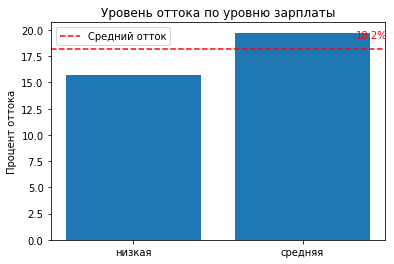

In [148]:
# уровни оттока
churn_level = bank_clients.groupby('salary_category')['churn'].mean() * 100

# уровень реднего оттока по всему банку
avg_churn_level = bank_clients['churn'].mean() * 100
plt.bar(churn_level.index, churn_level)

plt.axhline(avg_churn_level, color='red', linestyle='--', label='Средний отток') #линия ср оттока
plt.text(len(churn_level) - 0.5, avg_churn_level +1, f'{avg_churn_level:.1f}%', ha='right', color='red')

plt.title('Уровень оттока по уровню зарплаты')
plt.ylabel('Процент оттока')

plt.legend()
plt.show()

Мы видим, что уровень оттока выше среднего наблюдается у клиентов со средней заработной платой 

In [149]:
#for col in ['age_category', 'products','score_category','salary_category']:
   # plt.figure(figsize=(15,7))
    #ax=sns.countplot(data=bank_clients, x=col, hue='churn');
    #av_churn = bank_clients['churn'].mean()*100 #расчет ср оттока по всему банку
    #perc = bank_clients.pivot_table(index=col, columns='churn', values='user_id', aggfunc='count')
    #perc['клиенты банка'] = round((perc[0] / (perc[0] + perc[1]))*100, 2)
    #perc['не клиенты банка'] = 100 - perc['клиенты банка']
    #perc['разница,%'] = ((perc[1]-perc[0])/perc[0]).round(2)*100
    #perc.shape[0]
    #print(perc)
    
    #plt.title(f'Отток по параметру {col}', fontsize = 15)
   # plt.legend(['клиенты банка', 'не клиенты банка'], fontsize = 10)
   # plt.ylabel('Количество клиентов')
   # plt.axhline(av_churn, color='red', linestyle='--', label='Средний отток') #добавление линии со ср оттоком по банку
   # plt.legend()
   # plt.show();

In [150]:
# составление таблциы со средними значениями по ушедшим и не ушедшим клиентам банка
#mean = bank_clients.drop(['user_id'], axis=1).groupby('churn').agg('mean').T
#mean

### Корреляционный анализ (с испольванием графика "тепловая карта")

In [151]:
#plt.figure(figsize=(15,8))
#sns.heatmap(bank_clients.corr(),annot=True, center=0, cmap='vlag')
#plt.title('Корреляция параметров');

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'estimation_salary', 'churn', 'woman', 'man', 'Rostov', 'Rybinsk', 'Yaroslavl']


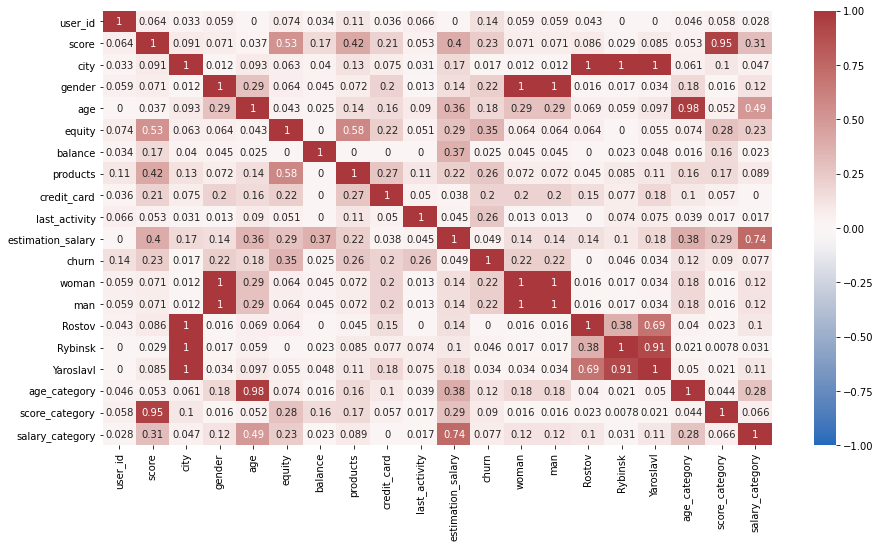

In [152]:
plt.figure(figsize=(15,8))
sns.heatmap(bank_clients.phik_matrix(), annot=True,vmin=-1, vmax=1, center=0, cmap='vlag')
plt.show();

По шкале Чеддока с помощью эмпирического корреляционного отношения оценивается теснота связи между изучаемыми признаками (какая часть общей колеблемости результативного признака вызывается колеблемостью факторного).
Согласно шкале Чеддока: 
- слабая связь (0,1-0,3) наблюдается у следующих пар параметров: balance-score, credit_card - age, credit_card-equity, credit_card-products, estimation_salary-equity,estimation_salary - products,  churn-score, churn-products, churn - credit_card, churn-last_activity, woman-age, woman-credit_card, woman-churn,  man-age, man-churn, Rostov - esrtimation_salary, Yaroslavl - credit_card, Yaroslavl - credit_card, age-gender.
- умеренная связь (0,3 - 0,5) наблюдается у следующих пар параметров: estimation_salary - balance, Yaroslavl - Rostov, salary_category-score, estimation_salary - age, churn-equity.
- заметная (0,5 - 0,7) наблюдается у следующих пар паарметров: equity-score,  equity = products.


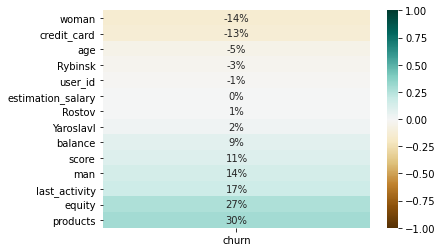

In [153]:
heatmap = sns.heatmap(
    bank_clients.corr()[['churn']].drop('churn').sort_values('churn'),
    vmin=-1, vmax=1, annot=True, cmap='BrBG', center=0, fmt=".0%")

По данному графику мы видим, что самая большая зависимость между churn - products, churn - equity. 
Отсутствует корреляция между churn - зарплата.

## Проверка статистических гипотез

### Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.


```
H_0: Нет оснований считать, что доходы между теми клиентами, что ушли  и теми, что остались, отличаются`
H_a: Доходы между теми клиентами, что ушли  и теми, что остались, отличаются`
alpha = 0.05
```

In [154]:
#from scipy import stats as st

In [155]:
simple_1 = bank_clients[bank_clients['churn'] == 1]['estimation_salary']
simple_2 = bank_clients[bank_clients['churn'] == 0]['estimation_salary']

result_1 = st.ttest_ind(simple_1, simple_2, equal_var=False) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = критический уровень статистической значимости 

print('р-значение:', result_1.pvalue) # вывод значения p-value на экран 
if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')# условный оператор с выводом строки с ответом

р-значение: 0.8354803526840116
Не получилось отвергнуть нулевую гипотизу


Доходы между теми клиентами, что ушли и теми, что остались отличаются.

In [156]:
result_2 = st.mannwhitneyu(simple_1, simple_2, use_continuity=True, alternative='two-sided')
alpha = 0.05 # alpha = критический уровень статистической значимости 

print('р-значение:', result_2.pvalue) # вывод значения p-value на экран 
if result_2.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')# условный оператор с выводом строки с ответом

р-значение: 0.00016830729188229058
Отвергаем нулевую гипотизу


In [157]:
estimation_salary = bank_clients['estimation_salary']
# Проверка нормальности распределения с помощью теста Шапиро-Уилка 
results = st.shapiro(estimation_salary)
alpha = 0.05 
print(results) 
if results.pvalue > alpha: 
    print("Данные удовлетворяют условиям нормальности.") 
else: 
    print("Данные не удовлетворяют условиям нормальности.")

ShapiroResult(statistic=0.6190118789672852, pvalue=0.0)
Данные не удовлетворяют условиям нормальности.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


U-критерий Манна-Уитни является непараметрическим критерием, поэтому, в отличие от t-критерия Стьюдента, не требует наличия нормального распределения сравниваемых совокупностей.
Так как по тесту Шапиро - Уилка нормального распределения мы не получили, то берем непараметрический критерий Манна-Уитни, который ранжирует наблюдения. t-Стьюдент покажет некорректные результаты, так как считает среднее по данным.

### Гипотеза различия рейтинга между теми клиентами, что ушли и теми, что остались.


```
H_0: Нет оснований считать, что рейтинг между теми клиентами, что ушли  и теми, что остались, отличаются`
H_a: Рейтинг между теми клиентами, что ушли  и теми, что остались, отличаются`
alpha = 0.05
```

In [158]:
simple_3 = bank_clients[bank_clients['churn'] == 1]['score']
simple_4 = bank_clients[bank_clients['churn'] == 0]['score']

results = st.ttest_ind(simple_3, simple_4, equal_var=False) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = критический уровень статистической значимости 

print('р-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')# условный оператор с выводом строки с ответом

р-значение: 1.3179430198200596e-37
Отвергаем нулевую гипотизу


Проверка гипотезы показала, что рейтинги между теми клиентами, что ушли и теми, что остались, отличаются.

In [159]:
score = bank_clients['score']
# Проверка нормальности распределения с помощью теста Шапиро-Уилка 
results = st.shapiro(score)
alpha = 0.05 
print(results) 
if results.pvalue > alpha: 
    print("Данные удовлетворяют условиям нормальности.") 
else: 
    print("Данные не удовлетворяют условиям нормальности.")

ShapiroResult(statistic=0.9883897304534912, pvalue=9.527601434937905e-28)
Данные не удовлетворяют условиям нормальности.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [160]:
result_4 = st.mannwhitneyu(simple_3, simple_4, use_continuity=True, alternative='two-sided')
alpha = 0.05 # alpha = критический уровень статистической значимости 

print('р-значение:', result_4.pvalue) # вывод значения p-value на экран 
if result_4.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')# условный оператор с выводом строки с ответом

р-значение: 4.508763537702903e-22
Отвергаем нулевую гипотизу


 три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:
 
Генеральные совокупности не должны зависеть друг от друга;

Выборочные средние должны быть нормально распределены;
(А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.)

Дисперсии рассматриваемых генеральных совокупностей должны быть равны.


### Гипотеза различий наличия кредитных карт между теми клиентами, что ушли и теми, что остались.


```
H_0: Нет оснований считать, что наличие кредитных карт между теми клиентами, что ушли  и теми, что остались, отличаются`
H_a: Наличие кредитных карт между теми клиентами, что ушли  и теми, что остались, отличаются`
alpha = 0.05
```

In [161]:
simple_1 = bank_clients[bank_clients['churn'] == 1]['credit_card']
simple_2 = bank_clients[bank_clients['churn'] == 0]['credit_card']

results = st.ttest_ind(simple_1, simple_2, equal_var=False) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = критический уровень статистической значимости 

print('р-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')# условный оператор с выводом строки с ответом

р-значение: 3.5339185146511654e-34
Отвергаем нулевую гипотизу


Проверка гипотезы показала, что наличие кредитных карт у тех клиентов, что ушли и тех, что остались отличаются.

In [162]:
churn = bank_clients[bank_clients['churn'] == 1]
not_churn = bank_clients[bank_clients['churn'] ==0]

In [163]:
# Выделение nobs и count для каждой группы 
simple_1 = churn['credit_card'].sum() 
simple_2 = not_churn['credit_card'].sum()
count_c = len(churn)
count_nc = len(not_churn)
# ztest 
results = proportions_ztest([simple_1, simple_2], [count_c, count_nc])

alpha = 0.05 # Уровень статистической значимости 
print(f'p-value = {results[1]}') 
print(f'alpha = {alpha}') 
if results[1] < alpha: 
    print("Отвергаем нулевую гипотезу. Существует статистически значимая разница в наличии кредитной карты между отточными и неотточными клиентами.") 
else: print("Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в наличии кредитной карты между отточными и неотточными клиентами.")

p-value = 1.3128935583367592e-38
alpha = 0.05
Отвергаем нулевую гипотезу. Существует статистически значимая разница в наличии кредитной карты между отточными и неотточными клиентами.


## Промежуточный итог

**Промежуточный вывод по анализу оттока клиентов:**

Большинство отточных клиентов банка имеют:
- возраст от 23 до 35 лет и от 50 до 61 лет;
- рейтинг от 850-900;

- 3-4 продуктов банка;
- имеют в собственности от 3 объектов;
- отточных мужчин почти в 2 раза больше чем отточных женщин;
- у активных клиентов % отточных клиентов более, чем в 2 раза больше, чем у неактивных;

Разница между теми клиентами, которые имеют кредитную карту и теми, которые ее не имеют в отношении оттока небольшая.

По анализу корреляции  мы увидели,что данные слабо коррелируют друг с другом и умеренная связь наблюдается у следующих пар параметров:
- собственность - количество продуктов, зарплата - баланс на счете, Ярославль - Ростов. 
- Рыбинск - Ярославль (высокая отрицательная зависимость).

## Сегментация на основе стратегических показателей

In [168]:

qrys = (
    'gender == "М" and products > 2 and score > 820',
    'gender == "М" and (23 < age <= 35) and equity > 3',
    'gender == "Ж" and products >2 and equity >3')

df_results = pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys])

display(df_results.style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))
    
all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if len(qrys) != 3:
    print('Результаты некорректны, нужно 3 лучших сегмента')
    
if df_results['Отток'].min() < df.churn.mean() * 1.5:
    print('Нужно изменить сегменты: присутствуют недостаточно отточные')
elif df_results['Отток'].min() < df.churn.mean() * 2:
    print('Часть сегментов не высокоотточна')
elif df_results['Отток'].max() > df.churn.mean() * 3:
    print('Нашли очень отточный сегмент')

if df_results['Размер'].min() < 300:
    print('Нужно изменить сегменты: присутствуют слишком мелкие сегменты')
    
if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

Часть сегментов не высокоотточна
В сегменты попало: 663/1819 = 36.4%


## Выводы и рекомендации для заказчика

1. По Сегменту_А мы получили отточность клиентов 57,6% и объем в 517 клиентов.

Мы бы посоветовали данному сегменту (мужчины, имеющие более 2 продуктов, с рейтингом более 800 пунктов) предложить мужчинам другие продукты банка еще. 

2. По Сегменту_В мы получили отточность клиентов 41,4% и объем в 739 клиентов.

Мы бы посоветовали данному сегменту (мужчины , с собственностью с рейтингом более 3, в возрасте 23-35) предложить оформить кредитную карту для оплаты их ежедневных трат  и более тесной связью с банком.

3. По Сегменту_С мы получили отточность клиентов 33,7% и обьем в 433 клиентов. 

Мы бы посоветовали данному сегменту (женщины, пользующиеся более 2 продуктами и собственностью с рейтингом > 3) предложить оформить страховые продукты ( на квартиру\ здоровье\ и т.д.).